<a href="https://colab.research.google.com/github/ShotaSuzuki-hogehoge/hangout_to_csv/blob/master/Hangout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google hangoutの履歴（JSON）を加工してCSVへ保存する


## How to use this program.
1.   下記よりデータ（JSON）を入手
（https://takeout.google.com/settings/takeout）
2.   GoogleDriveへデータを格納
3.   Hangout_Converter(LOAD_FILE_PATH)でロード
4.   Check_Conversation_Number()でどの会話を吐き出すかを確認
5.   Save_To_CSV(CONVERSATION_NUMBER, SAVE_FILE_PATH)でセーブ
6.   GoogleDriveへCSVデータが保存される

*   発言者はGAIA IDで記載

In [ ]:
import json
import pandas as pd

"""
LOAD_FILE_PATH：元のJSONファイルのパス
SAVE_FILE_PATH：保存するCSVファイルのパス
CONVERSATION_NUMBER：どのハングアウトルームを書き出すか
（どれがどのチャットルームかはprintで確認して！）
"""

LOAD_FILE_PATH = "./drive/My Drive/SourceData/Hangout/Hangouts.json"
SAVE_FILE_PATH = "./drive/My Drive/SourceData/Hangout/hangout_sort.csv"
CONVERSATION_NUMBER = 7

class Hangout_Converter:
  def __init__(self, LFP):
    self.d = {}
    with open(LFP, mode="r") as f:
      self.d = json.load(f)  
  def Check_Conversation_Number(self):
    print("ALL Conversations are below.")
    for CVS in range(len(self.d['conversations'])):
      message = [text['text'] for events in self.d['conversations'][CVS]['events'] if 'chat_message' in events.keys() and 'segment' in events['chat_message']['message_content'].keys() for text in events['chat_message']['message_content']['segment'] if text['type'] == "TEXT"]
      print("(CONVERSATION_NUMBER, latest message) = (", CVS,", ", message[-1], ")")
  def Save_To_CSV(self, CVN, SFP):
    """
    #----------内包表現確認用ここから----------
    for events in d['conversations'][1]['events']:
      if 'chat_message' in events.keys():
        for text in events['chat_message']['message_content']['segment']:
          if text['type'] == "TEXT":
            print(events['timestamp'])
    #------------------------------------------
    """
    #dataframeに入れる用のリストを作成
    time_stamp = [events['timestamp'] for events in self.d['conversations'][CVN]['events'] if 'chat_message' in events.keys() and 'segment' in events['chat_message']['message_content'].keys() for text in events['chat_message']['message_content']['segment'] if text['type'] == "TEXT"]
    gaia_id = [events['sender_id']['gaia_id'] for events in self.d['conversations'][CVN]['events'] if 'chat_message' in events.keys() and 'segment' in events['chat_message']['message_content'].keys() for text in events['chat_message']['message_content']['segment'] if text['type'] == "TEXT"]
    message = [text['text'] for events in self.d['conversations'][CVN]['events'] if 'chat_message' in events.keys() and 'segment' in events['chat_message']['message_content'].keys() for text in events['chat_message']['message_content']['segment'] if text['type'] == "TEXT"]

    #time_stampがstringで格納されるが、stringだとsort_valuesができないのでintに変換
    time_stamp = [(s) for s in time_stamp]

    #データフレームを作成
    df = pd.DataFrame({'time_stamp': time_stamp, 'gaia_id': gaia_id, 'message': message})

    #time_stanpでソートしてインデックスを振りなおす（下記のはまった点を参照）
    df.sort_values('time_stamp', inplace=True)
    df.reset_index(inplace=True, drop=True)

    #ファイルセーブ
    df.to_csv(SFP, encoding='utf_8_sig')
    print("-----☆☆☆Complete!(Conversation Number is ", CONVERSATION_NUMBER, ".)☆☆☆----- \n(", SFP, ")")


HOC = Hangout_Converter(LOAD_FILE_PATH)               #ファイルロード
HOC.Check_Conversation_Number()                       #どのハングアウトをcsv出力するか確認
HOC.Save_To_CSV(CONVERSATION_NUMBER, SAVE_FILE_PATH)  #コンバートしてセーブ


##Pitfalls

【問題点】
リストのサフィックスとタイムスタンプがリニアじゃないきがする。。。

【調査】
やっぱり横軸リニア、縦軸時間でデータとってみるとやっぱり途中で断絶してた。。。

なんでかはわからないがリストのサフィックスとタイムスタンプが単調に増加しない（仕様か？）

【対策】
タイムスタンプでソートするしかないでしょ。。。

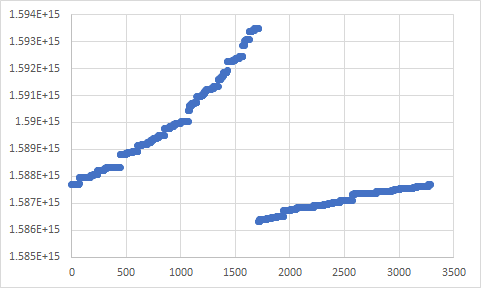